## 拿取資料

In [112]:
from finlab.data import Data

data = Data()

twii = data.get("發行量加權股價指數")
twii = twii['台股指數']
twii = twii.resample("5T").first().dropna()

## 製作 features

### 第一種方法

In [292]:
import talib
import pandas as pd

rsi = talib.RSI(twii, timeperiod=14)
k, d = talib.STOCH(twii, twii, twii)

dataset = pd.DataFrame({
    'rsi':rsi,
    'k':k,
    'd':d,
})

feature_names = dataset.columns

dataset['return'] = twii.shift(-10)/twii > 1

### 第二種方法(適合新手)

In [22]:
import finlab.ml as ml

twii_df = pd.DataFrame({
    'open':twii,
    'high':twii,
    'low':twii,
    'close':twii,
})

indicators = ['STOCH', 'RSI', 'ADXR']
multiplier = [1, 5, 10, 20, 30, 50, 60]

dataset = ml.talib_features(twii_df, indicators, multiplier)
feature_names = list(dataset.columns[:-1])

dataset['return'] = twii.shift(-10)/twii

In [113]:
import talib
import numpy as np
import pandas as pd

sma = talib.SMA(twii, timeperiod=120)
ema = talib.EMA(twii, timeperiod=120)
wma = talib.WMA(twii, timeperiod=120)
mom = talib.MOM(twii, timeperiod=120)
k, d = talib.STOCH  (twii, twii, twii, fastk_period=120, slowk_period=60, slowd_period=60)
k2, d2 = talib.STOCH(twii, twii, twii, fastk_period=240, slowk_period=120, slowd_period=120)
k3, d3 = talib.STOCH(twii, twii, twii, fastk_period=360, slowk_period=180, slowd_period=180)
k4, d4 = talib.STOCH(twii, twii, twii, fastk_period=480, slowk_period=240, slowd_period=240)
k5, d5 = talib.STOCH(twii, twii, twii, fastk_period=640, slowk_period=320, slowd_period=320)
k6, d6 = talib.STOCH(twii, twii, twii, fastk_period=720, slowk_period=360, slowd_period=360)
k7, d7 = talib.STOCH(twii, twii, twii, fastk_period=840, slowk_period=420, slowd_period=420)
k8, d8 = talib.STOCH(twii, twii, twii, fastk_period=960, slowk_period=480, slowd_period=480)

rsi = talib.RSI (twii, timeperiod=120)
rsi2 = talib.RSI(twii, timeperiod=240)
rsi3 = talib.RSI(twii, timeperiod=480)
rsi4 = talib.RSI(twii, timeperiod=640)
rsi5 = talib.RSI(twii, timeperiod=720)
rsi6 = talib.RSI(twii, timeperiod=840)

macd1, macd2, macd3 = talib.MACD(twii, fastperiod=120, slowperiod=60, signalperiod=60)
willr = talib.WILLR(twii, twii, twii, timeperiod=120)
cci = talib.CCI(twii, twii, twii, timeperiod=120)

dataset = pd.DataFrame({
    #'SMA':sma,
    #'EMA':ema,
    #'WMA':wma,
    #'MOM':mom,
    #'WILLR':willr,
    #'CCI':cci,
    'MACD1':macd1,
    #'MACD2':macd2,
    'RSIb': rsi / 50,
    'RSIb2': rsi2 / 50,
    'RSIb3': rsi3 / 50,
    'RSIb4': rsi4 / 50,
    'RSIb5': rsi5 / 50,
    'RSIb6': rsi6 / 50,
    'KDb': k - d,
    'KDb2': k2 - d2,
    'KDb3': k3 - d3,
    'KDb4': k4 - d4,
    'KDb5': k5 - d5,
    'KDb6': k6 - d6,
    'KDb7': k7 - d7,
    'KDb8': k8 - d8,
    
    'a5':   (twii.rolling(5).mean()   / twii),
    #'a10':  (twii.rolling(10).mean()  / twii),
    'a20':  (twii.rolling(20).mean()  / twii),
    'a40':  (twii.rolling(40).mean()  / twii),
    'a80':  (twii.rolling(80).mean()  / twii),
    'a160': (twii.rolling(160).mean() / twii),
    'a320': (twii.rolling(320).mean() / twii),
    'a640': (twii.rolling(640).mean() / twii),
    'a720': (twii.rolling(720).mean() / twii),
    'a840': (twii.rolling(840).mean() / twii),
    #'a960': (twii.rolling(960).mean() / twii),
    'a1024':(twii.rolling(1024).mean() / twii),
    'b1': twii/twii.shift(50),
    'b2': twii/twii.shift(100),
    'b3': twii/twii.shift(150),
    'b4': twii/twii.shift(200),
    'b5': twii/twii.shift(250),
    'b6': twii/twii.shift(300),
    'b7': twii/twii.shift(350),
    'LS0': talib.LINEARREG_SLOPE(twii, 60),
    'LS1': talib.LINEARREG_SLOPE(twii, 120),

    'ADXR0': talib.ADXR(twii, twii, twii, 60),
    'ADXR1': talib.ADXR(twii, twii, twii, 120),
    'ADXR2': talib.ADXR(twii, twii, twii, 240),
    'ADXR3': talib.ADXR(twii, twii, twii, 360),
    'ADXR4': talib.ADXR(twii, twii, twii, 480),
    'ADXR5': talib.ADXR(twii, twii, twii, 640),
    
    #'ADX': talib.ADX(twii, twii, twii, 120),
    #'ATR': talib.ADX(twii, twii, twii, 120),

    'return': twii.shift(-10) > twii,
})

feature_names = list(dataset.columns[:-1])

## 訓練

In [ ]:
import lightgbm

fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [test],
            'eval_names': ['valid'],
            'verbose': 100,
            'categorical_feature': 'auto'}

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

#This parameter defines the number of HP points to be tested
n_HP_points_to_test = 100

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

dataset_train = dataset[:'2015']
train = (dataset_train[feature_names], dataset_train['return'])

gs.fit(*train, **fit_params)

In [263]:
gs.best_estimator_

LGBMClassifier(colsample_bytree=0.7756038066515227, metric='None',
               min_child_samples=424, min_child_weight=10000.0,
               n_estimators=5000, n_jobs=4, num_leaves=30, random_state=314,
               reg_alpha=0, reg_lambda=100, silent=True,
               subsample=0.9348658101450167)

In [114]:
import lightgbm as lgb

cf = lgb.LGBMClassifier(n_estimators=100)

dataset_train = dataset[:'2015']
dataset_test = dataset['2016':'2021']

train = (dataset_train[feature_names], dataset_train['return'])
test = (dataset_test[feature_names], dataset_test['return'])

cf.fit(*train)
cf.score(*test)

0.5123235075551151

In [115]:
(dataset_test['return'] ).sum() / len(dataset_test)

0.5216992816447857

## 測試哪些feature重要

<AxesSubplot:xlabel='importance', ylabel='feature_name'>

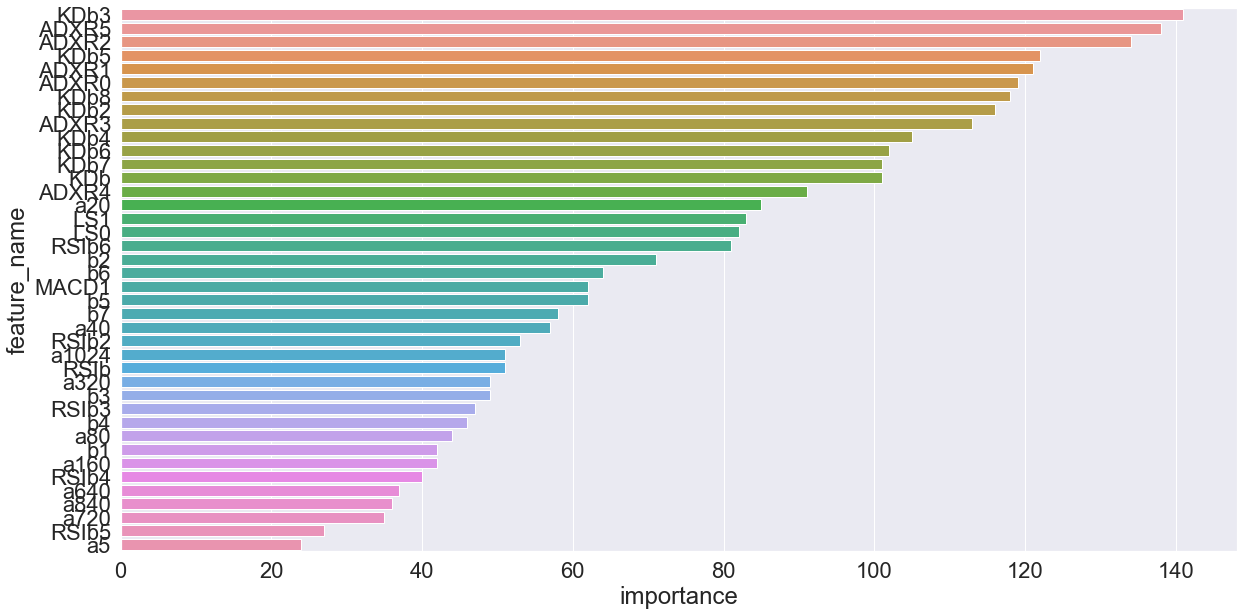

In [116]:
importance = pd.DataFrame(sorted(zip(feature_names, cf.feature_importances_)), columns=['feature_name', 'importance'])
importance.sort_values("importance", ascending=False)
importance

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))
labels = importance['feature_name']
colors = sns.color_palette('pastel')
sns.barplot(x="importance", y="feature_name", data=importance.sort_values(by="importance", ascending=False))
#plt.pie(importance['importance'], colors = colors)

## 回測一下

In [117]:
prediction = cf.predict_proba(dataset[feature_names])
prediction = prediction.swapaxes(0, 1)[1]
prediction = pd.Series(prediction, dataset.index)

5414.250000000042

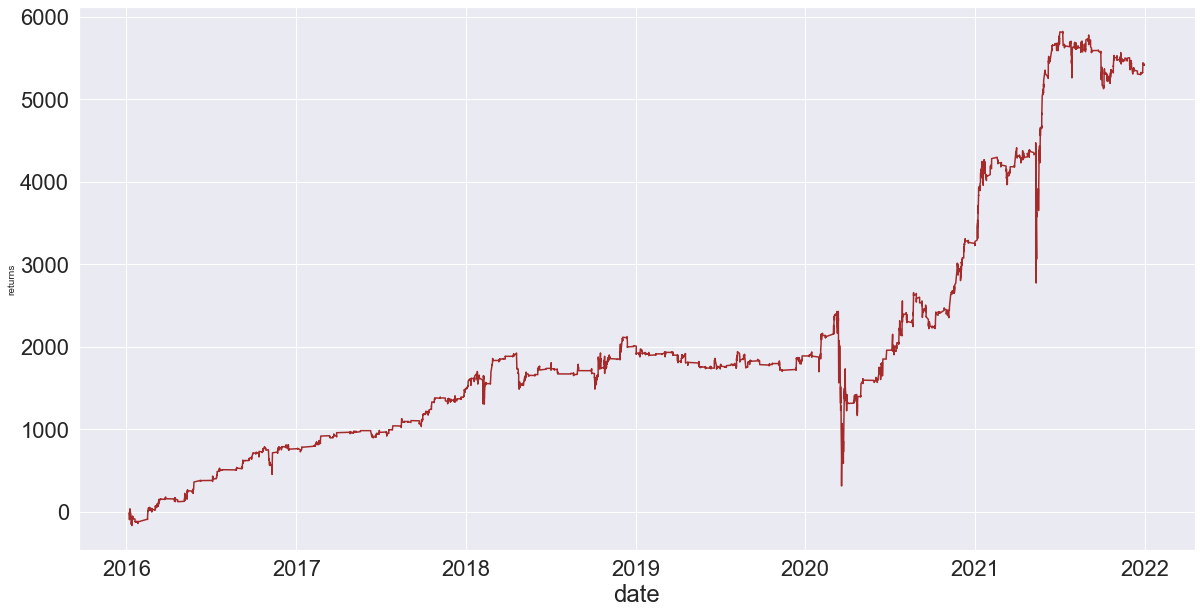

In [118]:
hold = (prediction > 0.6).rolling(5).sum() > 0
plt.figure(figsize=(20, 10))
returns = twii.shift(-1) - twii
data = returns[hold == True]['2016':'2021'].cumsum()
sns.set_style("whitegrid")
sns.set(font_scale = 2)
p = sns.lineplot(data=data, color='brown')
p.set_ylabel("returns", fontsize = 10)
data[-1]

## 手續費+滑價

In [119]:
hold.astype(int).diff().abs()['2016':'2021'].sum() * 3

4746.0

In [120]:
hold_count = hold['2016':'2021'].sum()

samples = []
import numpy as np
for i in range(1000):
    ret = (np.random.choice(returns['2016':'2021'].dropna(), hold_count).sum())
np.random.choice(returns['2016':'2021'].dropna(), hold_count)

array([-10.62,  -3.37,  -9.22, ...,   4.33,   7.98,  -8.3 ])

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

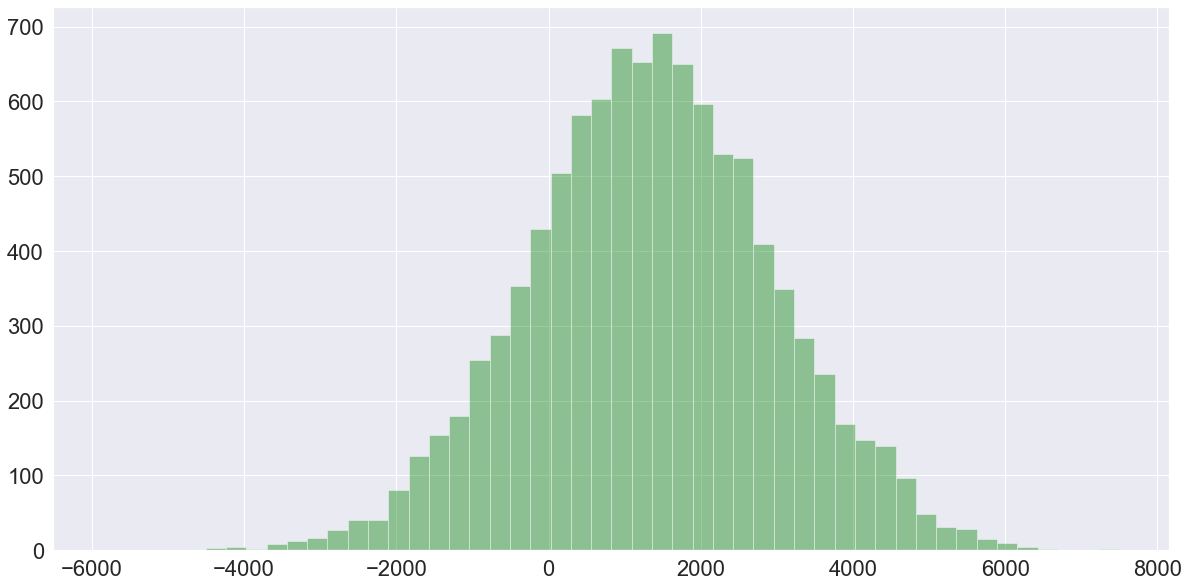

In [128]:
hold_count = hold['2016':'2021'].sum()

samples = []
import numpy as np
for i in range(10000):
    ret = (np.random.choice(returns['2016':'2021'].dropna(), hold_count).sum())
    samples.append(ret)
plt.figure(figsize=(20, 10))
#pd.Series(samples).hist()
sns.set_style("darkgrid")
sns.set(font_scale = 2)
sns.distplot(samples, kde=False, color='green')
#sns.barplot(samples.sum().index,samples.sum().values)
#sns.palplot(sns.color_palette("Blues"))

In [129]:
(pd.Series(samples) > 5800).sum() / len(samples)

0.0027